<a href="https://colab.research.google.com/github/VictorLuna02012003/Redes_Neuronales/blob/main/01_convulucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf #Facilita el trabajo en redes neuronales
import tensorflow_datasets as tfds #Coleccion de conjuntos

In [2]:
#Descargar sets de datos MNIST
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True) #as_superviced carga los datos en formato supervisado, with_info Devuelve los metadatos
#Obtener en variables separadas los datos de entrenamiento 60k y prueba
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
#Funcion de normalizacion para los datos
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /=255 #Aqui se pasa de 0-255
  return imagenes, etiquetas

In [4]:
#Normalizar los datos de entrenamiento con la funcion que hicimos
#map es una funcion que recorre sin la necesidad de usar ciclos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

In [5]:
#Agregar a cache
datos_entrenamiento = datos_entrenamiento.cache() #Carga de datos sea mas rapido
datos_pruebas = datos_pruebas.cache()

In [6]:
import matplotlib.pyplot as plt #Este modulo nos permite graficar

clases = [0,1,2,3,4,5,6,7,8,9]

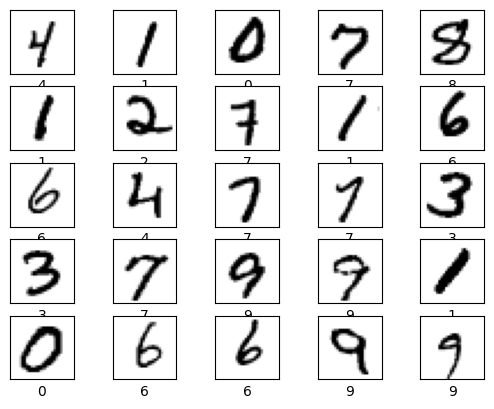

In [7]:
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)): #Ingresar la etiqueta e imagen dentro de los 25 datos de entrenamiento que tomaremos 
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5, 5, i+1) 
  plt.xticks([]) #Quitar marcas
  plt.yticks([]) 
  plt.grid(False) #Desactiva cuadricula
  plt.imshow(imagen, cmap=plt.cm.binary) 
  plt.xlabel(clases[etiqueta]) 
                               
plt.show() #Mostrar

In [8]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28,1)),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax') 
])

In [9]:
modelo.compile( #configuramos, el entrenamiento de nuestro modelo
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'] #Evalua el rendimiento del modelo durante el entrenamimiento
)

In [10]:
num_datos_entrenamiento = metadatos.splits['train'].num_examples #Estamos accediendo al conjunto de entrenamiento de metadatos y obtener el numero de ejemplos del conjunto de datos de entrenamiento
num_datos_pruebas = metadatos.splits['test'].num_examples

In [11]:
#Trabajar por lotes
TAMANO_LOTE=32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria
#para que el entrenamiento no se aprenda las cosas en orden
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(TAMANO_LOTE) 
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE) 

In [12]:
#Realizar el entrenamiento

import math
historical = modelo.fit(
    datos_entrenamiento,
    epochs = 60, 
    steps_per_epoch=math.ceil(num_datos_entrenamiento/TAMANO_LOTE) 
)

Epoch 1/60
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2949 - accuracy: 0.9130
Epoch 2/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1313 - accuracy: 0.9608
Epoch 3/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1015 - accuracy: 0.9694
Epoch 4/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0797 - accuracy: 0.9753
Epoch 5/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0680 - accuracy: 0.9791
Epoch 6/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0585 - accuracy: 0.9816
Epoch 7/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0488 - accuracy: 0.9844
Epoch 8/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0466 - accuracy: 0.9852
Epoch 9/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0409 - accuracy: 0.9869
Epoch 10/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.03

In [ ]:
#Exportar el modelo en formato en h5
modelo.save('numeros.h5') #Es el archivo binario, almacena grandes cantidades de datos de forma eficiente

In [ ]:
#El equipo es linux. Listemos el contenido de la carpeta actual para ver que se exporto el modelo
!ls

In [ ]:
#Para convertirlo en tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

In [ ]:
#Crear carpetas donde se colocaran los archivos resultantes
!mkdir carpeta_salida

In [ ]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_convert --input_format keras numeros.h5 carpeta_salida